In [1]:
import rf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import MultipleLocator

from math import ceil

In [2]:
stacks_file = "/g/data/ha3/am3591/ALL-analysis/20230224_003724/rfstacks.h5"
stacks = rf.read_rf(stacks_file, format="H5").sort(["delay"])
delays = [trace.stats.delay for trace in stacks]
norm = Normalize(vmin=min(delays), vmax=max(delays))
cmap = cm.plasma

In [3]:
nstacks = len(stacks)
stacks_per_column = 60
ncols = ceil(nstacks / stacks_per_column)

/scratch/vy72/am3591/tmp/ipykernel_1014640/3104474756.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="TPsb (s)")


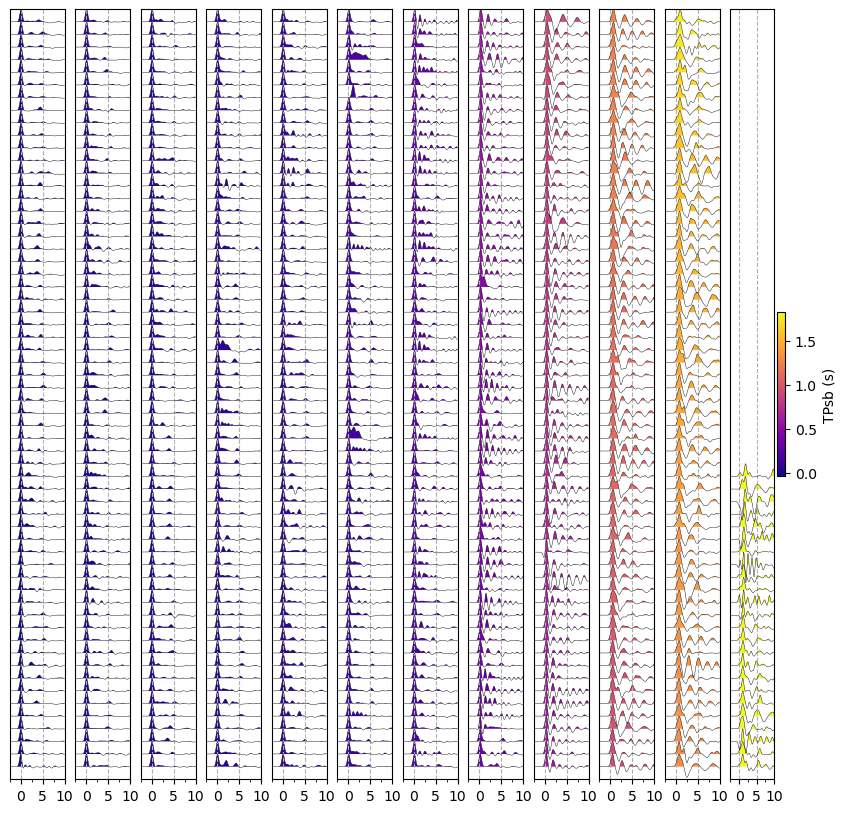

In [4]:
fig, axs = plt.subplots(1, ncols, figsize=(10, 10))
for j, ax in enumerate(axs):
    i = 0
    column_stations = []
    while i < stacks_per_column:
        try:
            stack = stacks[j * stacks_per_column + i]
        except IndexError:
            # plot nothing so that what is plotted doesn't get stretched along y
            ax.plot(times, data + i, alpha=0)
            i += 1
            continue
        times = stack.times() - stack.stats.onset.second
        data = stack.data
        data /= data.max()
        ax.fill_between(times, data + i, i, where=data>=0, fc=cmap(stack.stats.delay))
        ax.plot(times, data + i, "k", lw=0.3)
        column_stations.append(stack.meta.station)
        i += 1

for ax in axs:
    ax.set_yticks([],[])
    ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xlim([-2.5, 10])
    ax.set_ylim([-1, stacks_per_column])
    ax.grid(True, ls="--")

sm = cm.ScalarMappable(norm, cmap=cmap)
plt.colorbar(sm, label="TPsb (s)")